<a href="https://colab.research.google.com/github/RocketKitty6/UAS_Data-Science/blob/main/Angka_Harapan_Hidup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyspark
!pip install matplotlib seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=647a70f67317424bfad5c9d5b418dd1d11a8b0c2396a6ae040e8c4bb2d5244eb
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import matplotlib.pyplot as plt
from pyspark.sql.functions import avg
from sklearn.linear_model import LinearRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression

In [ ]:
# Membuat sesi Spark
spark = SparkSession.builder.appName("Angka Harapan Hidup").getOrCreate()

In [ ]:
#Membaca dataset dan mengubahnya menjadi dataframe:
data = spark.read.csv("AngkaHarapanHidup.csv", header=True, inferSchema=True)

In [ ]:
data.printSchema()

root
 |-- Provinsi/Kabupaten/Kota: string (nullable = true)
 |-- Laki-laki (2020): double (nullable = true)
 |-- Laki-laki (2021): double (nullable = true)
 |-- Laki-laki (2022): double (nullable = true)
 |-- Perempuan (2020): double (nullable = true)
 |-- Perempuan (2021): double (nullable = true)
 |-- Perempuan (2022): double (nullable = true)



In [ ]:
data.show()

+-----------------------+----------------+----------------+----------------+----------------+----------------+----------------+
|Provinsi/Kabupaten/Kota|Laki-laki (2020)|Laki-laki (2021)|Laki-laki (2022)|Perempuan (2020)|Perempuan (2021)|Perempuan (2022)|
+-----------------------+----------------+----------------+----------------+----------------+----------------+----------------+
|                   ACEH|           68.04|           68.07|           68.26|           71.91|           71.94|           72.16|
|               Simeulue|            63.3|           63.33|           63.52|           67.14|           67.15|           67.36|
|           Aceh Singkil|           65.39|            65.4|           65.56|           69.31|           69.31|           69.54|
|           Aceh Selatan|            62.4|           62.46|           62.68|            66.2|           66.26|           66.51|
|          Aceh Tenggara|           66.11|           66.17|           66.39|           70.06|           

In [ ]:
from pyspark.sql.functions import col

# Looping untuk menghitung jumlah nilai null dalam setiap kolom
null_counts = [data.where(col(c).isNull()).count() for c in data.columns]

# Menggabungkan nama kolom dengan jumlah null-nya
nulls_in_columns = zip(data.columns, null_counts)

# Menampilkan jumlah null dalam setiap kolom
for column, null_count in nulls_in_columns:
    print(f"Kolom '{column}' memiliki {null_count} nilai null")

Kolom 'Provinsi/Kabupaten/Kota' memiliki 0 nilai null
Kolom 'Laki-laki (2020)' memiliki 0 nilai null
Kolom 'Laki-laki (2021)' memiliki 0 nilai null
Kolom 'Laki-laki (2022)' memiliki 0 nilai null
Kolom 'Perempuan (2020)' memiliki 0 nilai null
Kolom 'Perempuan (2021)' memiliki 0 nilai null
Kolom 'Perempuan (2022)' memiliki 0 nilai null


In [ ]:
import pandas as pd
pandas_df = data.toPandas()

<Axes: >

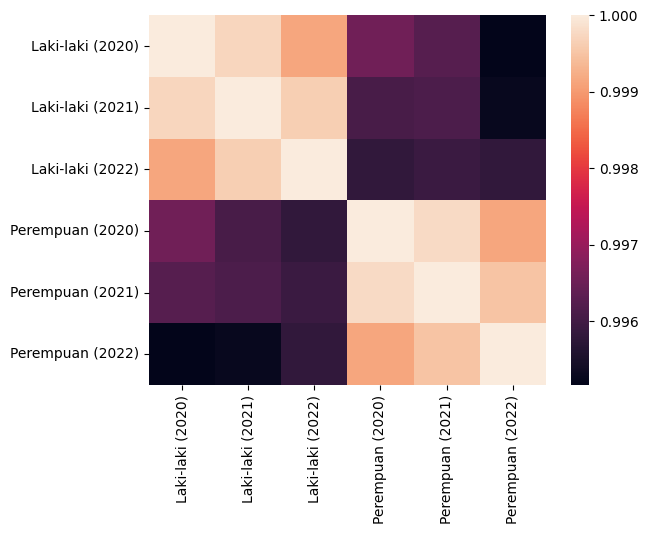

In [ ]:
import seaborn as sns
sns.heatmap(data.toPandas().corr(numeric_only=True))

In [ ]:
# Membaca nilai korelasi antara dua kolom pada DataFrame
nilai_korelasi = data.corr('Laki-laki (2020)', 'Laki-laki (2022)')
print("Nilai korelasi antara 2020 dan 2022:", nilai_korelasi)

# Membaca nilai korelasi antara dua kolom pada DataFrame
nilai_korelasi = data.corr('Laki-laki (2021)', 'Laki-laki (2022)')
print("Nilai korelasi antara 2021 dan 2022:", nilai_korelasi)

Nilai korelasi antara 2020 dan 2022: 0.9991380804652865
Nilai korelasi antara 2021 dan 2022: 0.9996263289727229


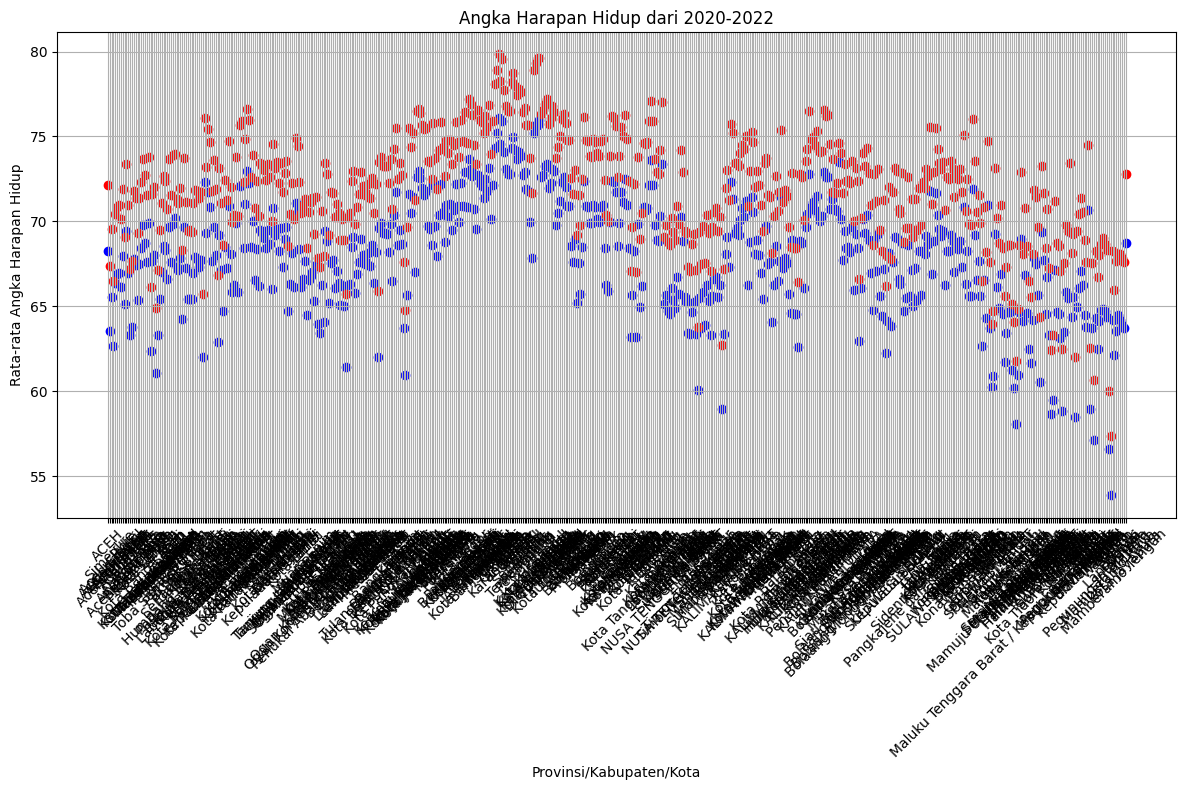

In [ ]:
# Visualisasi data menggunakan Matplotlib
plt.figure(figsize=(12, 8))
plt.scatter(pandas_df["Provinsi/Kabupaten/Kota"], pandas_df['Laki-laki (2022)'], marker='o', color='blue')
plt.scatter(pandas_df["Provinsi/Kabupaten/Kota"], pandas_df['Perempuan (2022)'], marker='o', color='red')
plt.title('Angka Harapan Hidup dari 2020-2022')
plt.xlabel('Provinsi/Kabupaten/Kota')
plt.ylabel('Rata-rata Angka Harapan Hidup')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

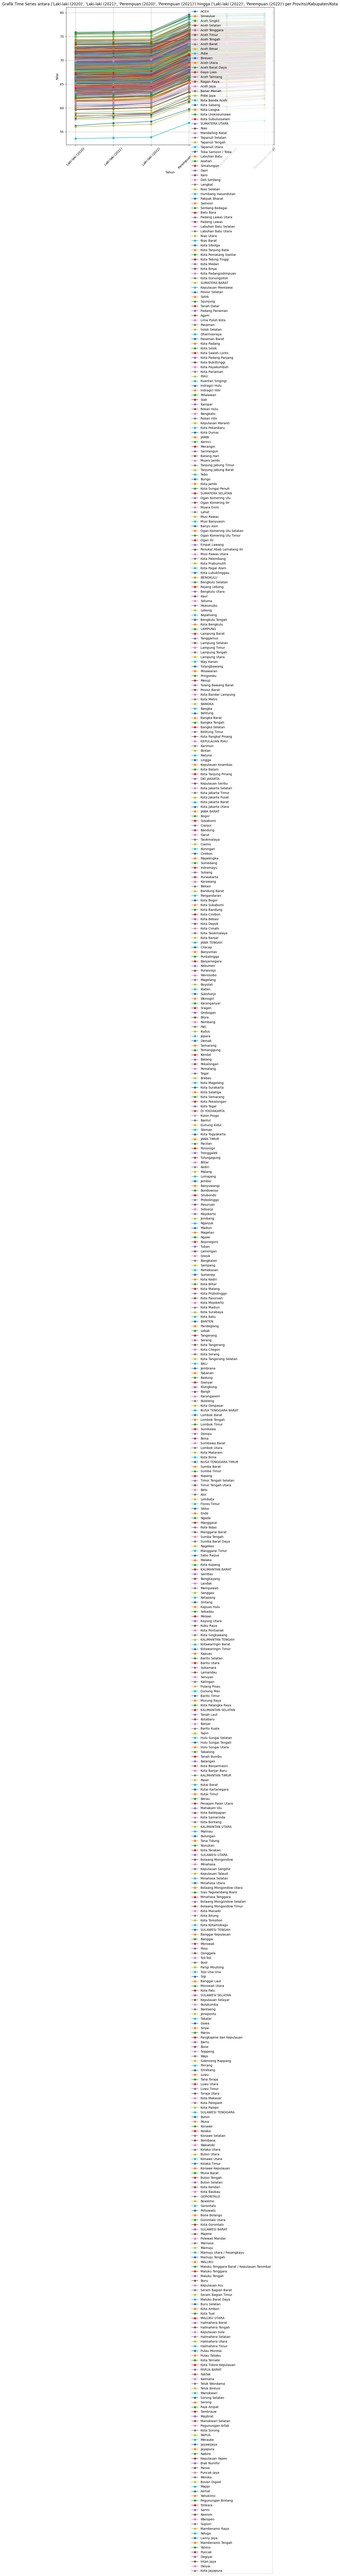

In [ ]:
# Menentukan Variabel X dan Y
variable_x = 'Laki-laki (2020)', 'Laki-laki (2021)', 'Perempuan (2020)', 'Perempuan (2021)'
variable_y = 'Laki-laki (2022)', 'Perempuan (2022)'

# Visualisasi grafik time series
plt.figure(figsize=(12, 8))
for index, row in pandas_df.iterrows():
    plt.plot(pandas_df.columns[1:], row.values[1:], marker='o', label=row[0])

plt.xlabel('Tahun')
plt.ylabel('Nilai')
plt.title(f'Grafik Time Series antara {variable_x} hingga {variable_y} per Provinsi/Kabupaten/Kota')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
# Menghitung rata-rata per baris dari kolom-kolom tahunan dan menambahkan kolom avg
data = data.withColumn("Rata-rata 2020-2022", sum(col(c) for c in data.columns[1:]) / len(data.columns[1:]))

# Menampilkan hasil
data.show()

+-----------------------+----------------+----------------+----------------+----------------+----------------+----------------+-------------------+
|Provinsi/Kabupaten/Kota|Laki-laki (2020)|Laki-laki (2021)|Laki-laki (2022)|Perempuan (2020)|Perempuan (2021)|Perempuan (2022)|Rata-rata 2020-2022|
+-----------------------+----------------+----------------+----------------+----------------+----------------+----------------+-------------------+
|                   ACEH|           68.04|           68.07|           68.26|           71.91|           71.94|           72.16|  70.06333333333333|
|               Simeulue|            63.3|           63.33|           63.52|           67.14|           67.15|           67.36|  65.30000000000001|
|           Aceh Singkil|           65.39|            65.4|           65.56|           69.31|           69.31|           69.54|  67.41833333333334|
|           Aceh Selatan|            62.4|           62.46|           62.68|            66.2|           66.26|  

**Laki-Laki**

In [ ]:
#PEMILIHAN FITUR YANG DIINGINKAN
# Misalnya, jika 'angka harapan hidup' adalah kolom yang ingin Anda prediksi
selected_data = data.select('Provinsi/Kabupaten/Kota', 'Laki-laki (2020)', 'Laki-laki (2021)', 'Laki-laki (2022)')
selected_data.show()

+-----------------------+----------------+----------------+----------------+
|Provinsi/Kabupaten/Kota|Laki-laki (2020)|Laki-laki (2021)|Laki-laki (2022)|
+-----------------------+----------------+----------------+----------------+
|                   ACEH|           68.04|           68.07|           68.26|
|               Simeulue|            63.3|           63.33|           63.52|
|           Aceh Singkil|           65.39|            65.4|           65.56|
|           Aceh Selatan|            62.4|           62.46|           62.68|
|          Aceh Tenggara|           66.11|           66.17|           66.39|
|             Aceh Timur|           66.72|           66.76|           66.92|
|            Aceh Tengah|            66.8|            66.8|           66.95|
|             Aceh Barat|           65.95|           65.96|           66.13|
|             Aceh Besar|            67.8|            67.8|           67.96|
|                  Pidie|           64.94|           64.95|           65.12|

In [ ]:
#PEMISAHAN DATA TRAINING DAN DATA TESTING
# Memisahkan data menjadi data latih dan data uji dengan perbandingan 80:20
train_data_l, test_data_l = selected_data.randomSplit([0.8, 0.2], seed=42)
train_data_l.show()

+-----------------------+----------------+----------------+----------------+
|Provinsi/Kabupaten/Kota|Laki-laki (2020)|Laki-laki (2021)|Laki-laki (2022)|
+-----------------------+----------------+----------------+----------------+
|                   ACEH|           68.04|           68.07|           68.26|
|             Aceh Barat|           65.95|           65.96|           66.13|
|             Aceh Besar|            67.8|            67.8|           67.96|
|              Aceh Jaya|           65.16|           65.19|           65.37|
|           Aceh Selatan|            62.4|           62.46|           62.68|
|           Aceh Tamiang|           67.56|           67.59|           67.78|
|          Aceh Tenggara|           66.11|           66.17|           66.39|
|             Aceh Timur|           66.72|           66.76|           66.92|
|             Aceh Utara|           66.78|           66.78|           66.94|
|                   Agam|           70.41|           70.58|           70.93|

In [ ]:
test_data_l.show()

+-----------------------+----------------+----------------+----------------+
|Provinsi/Kabupaten/Kota|Laki-laki (2020)|Laki-laki (2021)|Laki-laki (2022)|
+-----------------------+----------------+----------------+----------------+
|        Aceh Barat Daya|           63.04|            63.1|           63.31|
|           Aceh Singkil|           65.39|            65.4|           65.56|
|            Aceh Tengah|            66.8|            66.8|           66.95|
|                   Alor|            59.6|           59.78|           60.08|
|               BENGKULU|           67.47|           67.54|           67.74|
|          Bandung Barat|           70.43|            70.7|           70.88|
|         Bangka Selatan|            66.1|           66.26|           66.51|
|               Bantaeng|           68.45|           68.45|           68.72|
|                 Batang|           72.84|           72.89|           72.93|
|            Batang Hari|           68.61|            68.7|           68.97|

In [ ]:
#Pembuatan Model Regresi Linear
assembler = VectorAssembler(inputCols=['Laki-laki (2020)', 'Laki-laki (2021)', 'Laki-laki (2022)'], outputCol='rata-rata angka harapan hidup laki-laki')
train_data = assembler.transform(train_data_l)
test_data = assembler.transform(test_data_l)

In [ ]:
# Inisialisasi model regresi linear
lr = LinearRegression(featuresCol='rata-rata angka harapan hidup laki-laki', labelCol='Laki-laki (2022)')

In [ ]:
# Melatih model menggunakan data latih
model = lr.fit(train_data)

In [ ]:
# Melakukan prediksi menggunakan data uji
predictions = model.transform(test_data)

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator

# Misalnya, gunakan RMSE sebagai metrik evaluasi
evaluator_rmse = RegressionEvaluator(labelCol='Laki-laki (2022)', predictionCol='prediction', metricName='rmse')
evaluator_mae = RegressionEvaluator(labelCol='Laki-laki (2022)', predictionCol='prediction', metricName='mae')
evaluator_r2 = RegressionEvaluator(labelCol='Laki-laki (2022)', predictionCol='prediction', metricName='r2')

# Hitung nilai metrik untuk model
rmse = evaluator_rmse.evaluate(predictions)
mae = evaluator_mae.evaluate(predictions)
r2 = evaluator_r2.evaluate(predictions)

# Tampilkan hasil evaluasi
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')

Root Mean Squared Error (RMSE): 1.5086904823569852e-11
R-squared (R2): 1.0


In [ ]:
# Tampilkan beberapa contoh hasil prediksi untuk jenis kelamin Laki-laki
predictions.select('Provinsi/Kabupaten/Kota', 'Laki-laki (2020)', 'Laki-laki (2021)', 'Laki-laki (2022)', 'prediction').show()

+-----------------------+----------------+----------------+----------------+------------------+
|Provinsi/Kabupaten/Kota|Laki-laki (2020)|Laki-laki (2021)|Laki-laki (2022)|        prediction|
+-----------------------+----------------+----------------+----------------+------------------+
|        Aceh Barat Daya|           63.04|            63.1|           63.31| 63.31000000001446|
|           Aceh Singkil|           65.39|            65.4|           65.56| 65.56000000002311|
|            Aceh Tengah|            66.8|            66.8|           66.95| 66.95000000002416|
|                   Alor|            59.6|           59.78|           60.08| 60.07999999999259|
|               BENGKULU|           67.47|           67.54|           67.74|  67.7400000000095|
|          Bandung Barat|           70.43|            70.7|           70.88| 70.87999999996929|
|         Bangka Selatan|            66.1|           66.26|           66.51|  66.5099999999925|
|               Bantaeng|           68.4

**Perempuan**

In [ ]:
#PEMILIHAN FITUR YANG DIINGINKAN
# Misalnya, jika 'angka harapan hidup' adalah kolom yang ingin Anda prediksi
selected_data = data.select('Provinsi/Kabupaten/Kota', 'Perempuan (2020)', 'Perempuan (2021)', 'Perempuan (2022)')
selected_data.show()

+-----------------------+----------------+----------------+----------------+
|Provinsi/Kabupaten/Kota|Perempuan (2020)|Perempuan (2021)|Perempuan (2022)|
+-----------------------+----------------+----------------+----------------+
|                   ACEH|           71.91|           71.94|           72.16|
|               Simeulue|           67.14|           67.15|           67.36|
|           Aceh Singkil|           69.31|           69.31|           69.54|
|           Aceh Selatan|            66.2|           66.26|           66.51|
|          Aceh Tenggara|           70.06|           70.14|           70.42|
|             Aceh Timur|           70.63|           70.65|           70.86|
|            Aceh Tengah|           70.78|           70.78|           70.98|
|             Aceh Barat|           69.91|           69.93|           70.14|
|             Aceh Besar|           71.69|           71.69|            71.9|
|                  Pidie|           68.84|           68.85|           69.06|

In [ ]:
#PEMISAHAN DATA TRAINING DAN DATA TESTING
# Memisahkan data menjadi data latih dan data uji dengan perbandingan 80:20
train_data_p, test_data_p = selected_data.randomSplit([0.8, 0.2], seed=42)
train_data_p.show()

+-----------------------+----------------+----------------+----------------+
|Provinsi/Kabupaten/Kota|Perempuan (2020)|Perempuan (2021)|Perempuan (2022)|
+-----------------------+----------------+----------------+----------------+
|                   ACEH|           71.91|           71.94|           72.16|
|             Aceh Barat|           69.91|           69.93|           70.14|
|             Aceh Besar|           71.69|           71.69|            71.9|
|              Aceh Jaya|           69.06|           69.09|           69.31|
|           Aceh Selatan|            66.2|           66.26|           66.51|
|           Aceh Tamiang|            71.5|           71.54|           71.79|
|          Aceh Tenggara|           70.06|           70.14|           70.42|
|             Aceh Timur|           70.63|           70.65|           70.86|
|             Aceh Utara|           70.73|           70.73|           70.94|
|                   Agam|           74.24|           74.39|           74.75|

In [ ]:
test_data_p.show()

+-----------------------+----------------+----------------+----------------+
|Provinsi/Kabupaten/Kota|Perempuan (2020)|Perempuan (2021)|Perempuan (2022)|
+-----------------------+----------------+----------------+----------------+
|        Aceh Barat Daya|           66.86|           66.93|           67.18|
|           Aceh Singkil|           69.31|           69.31|           69.54|
|            Aceh Tengah|           70.78|           70.78|           70.98|
|                   Alor|           63.26|           63.42|           63.78|
|               BENGKULU|           71.27|            71.4|           71.68|
|          Bandung Barat|            74.2|           74.39|           74.67|
|         Bangka Selatan|            70.1|           70.34|           70.72|
|               Bantaeng|           72.46|           72.53|           72.82|
|                 Batang|           76.58|           76.65|            76.7|
|            Batang Hari|           72.48|           72.56|           72.87|

In [ ]:
#Pembuatan Model Regresi Linear
assembler = VectorAssembler(inputCols=['Perempuan (2020)', 'Perempuan (2021)', 'Perempuan (2022)'], outputCol='rata-rata angka harapan hidup perempuan')
train_data = assembler.transform(train_data_p)
test_data = assembler.transform(test_data_p)

In [ ]:
# Inisialisasi model regresi linear
lr = LinearRegression(featuresCol='rata-rata angka harapan hidup perempuan', labelCol='Perempuan (2022)')

In [ ]:
# Melatih model menggunakan data latih
model = lr.fit(train_data)

In [ ]:
# Melakukan prediksi menggunakan data uji
predictions = model.transform(test_data)

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator

# Misalnya, gunakan RMSE sebagai metrik evaluasi
evaluator_rmse = RegressionEvaluator(labelCol='Perempuan (2022)', predictionCol='prediction', metricName='rmse')
evaluator_mae = RegressionEvaluator(labelCol='Perempuan (2022)', predictionCol='prediction', metricName='mae')
evaluator_r2 = RegressionEvaluator(labelCol='Perempuan (2022)', predictionCol='prediction', metricName='r2')

# Hitung nilai metrik untuk model
rmse = evaluator_rmse.evaluate(predictions)
mae = evaluator_mae.evaluate(predictions)
r2 = evaluator_r2.evaluate(predictions)

# Tampilkan hasil evaluasi
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')

Root Mean Squared Error (RMSE): 1.0777097012481288e-11
R-squared (R2): 1.0


In [ ]:
# Tampilkan beberapa contoh hasil prediksi untuk jenis kelamin Laki-laki
predictions.select('Provinsi/Kabupaten/Kota', 'Perempuan (2020)', 'Perempuan (2021)', 'Perempuan (2022)', 'prediction').show()

+-----------------------+----------------+----------------+----------------+-----------------+
|Provinsi/Kabupaten/Kota|Perempuan (2020)|Perempuan (2021)|Perempuan (2022)|       prediction|
+-----------------------+----------------+----------------+----------------+-----------------+
|        Aceh Barat Daya|           66.86|           66.93|           67.18|67.18000000001116|
|           Aceh Singkil|           69.31|           69.31|           69.54| 69.5400000000075|
|            Aceh Tengah|           70.78|           70.78|           70.98|70.98000000000856|
|                   Alor|           63.26|           63.42|           63.78| 63.7800000000071|
|               BENGKULU|           71.27|            71.4|           71.68|71.68000000000268|
|          Bandung Barat|            74.2|           74.39|           74.67|74.66999999999989|
|         Bangka Selatan|            70.1|           70.34|           70.72|70.71999999999655|
|               Bantaeng|           72.46|        